# Top 50 Spotify Songs in 2019

Spotify is a digital music streaming service that gives you access to millions of songs from artists all over the world.


In this project, we'll examine the Top 50 songs on Spotify in 2019. This dataset contains 50 songs and was downloaded from Kaggle.

## Importing Modules and CSV

First, we need to import the modules we'll be using as well as the CSV file.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

filename = 'spotify_top_50.csv'

df = pd.read_csv(filename, encoding = 'ISO-8859-1')

## Exploring the Dataframe

In [3]:
df.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


Looking at the top 5 rows, we can see a column called 'Unnamed' that does not appear to be useful. Let's delete this.

In [4]:
#delete the unnecessary column

del df['Unnamed: 0']

#Check the dataframe to make sure the column was deleted

df.head()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


We can also see that some of the column names have distracting punctuation. Let's clean those up to make our data easier to read.

In [5]:
print(df.columns)

Index(['Track.Name', 'Artist.Name', 'Genre', 'Beats.Per.Minute', 'Energy',
       'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.', 'Length.',
       'Acousticness..', 'Speechiness.', 'Popularity'],
      dtype='object')


In [6]:
df.columns = ['Track_Name','Artist_Name','Genre','BPM','Energy','Danceability','Loudness','Liveness','Valence','Length','Acousticness','Speechiness','Popularity']
print(df.columns)

Index(['Track_Name', 'Artist_Name', 'Genre', 'BPM', 'Energy', 'Danceability',
       'Loudness', 'Liveness', 'Valence', 'Length', 'Acousticness',
       'Speechiness', 'Popularity'],
      dtype='object')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
Track_Name      50 non-null object
Artist_Name     50 non-null object
Genre           50 non-null object
BPM             50 non-null int64
Energy          50 non-null int64
Danceability    50 non-null int64
Loudness        50 non-null int64
Liveness        50 non-null int64
Valence         50 non-null int64
Length          50 non-null int64
Acousticness    50 non-null int64
Speechiness     50 non-null int64
Popularity      50 non-null int64
dtypes: int64(10), object(3)
memory usage: 5.2+ KB


In [8]:
df.shape

(50, 13)

In [9]:
df.describe().round(2)

,BPM,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
count,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00
mean,120.06,64.06,71.38,-5.66,14.66,54.60,200.96,22.16,12.48,87.50
std,30.90,14.23,11.93,2.06,11.12,22.34,39.14,19.00,11.16,4.49
min,85.00,32.00,29.00,-11.00,5.00,10.00,115.00,1.00,3.00,70.00
25%,96.00,55.25,67.00,-6.75,8.00,38.25,176.75,8.25,5.00,86.00
50%,104.50,66.50,73.50,-6.00,11.00,55.50,198.00,15.00,7.00,88.00
75%,137.50,74.75,79.75,-4.00,15.75,69.50,217.50,33.75,15.00,90.75
max,190.00,88.00,90.00,-2.00,58.00,95.00,309.00,75.00,46.00,95.00


Lastly, let's check to see if the dataset contains any null values.

In [10]:
df.isnull().any()

Track_Name      False
Artist_Name     False
Genre           False
BPM             False
Energy          False
Danceability    False
Loudness        False
Liveness        False
Valence         False
Length          False
Acousticness    False
Speechiness     False
Popularity      False
dtype: bool

## Diving Deeper

Let's see what genres make up the Spotify list.

Text(0.5, 1.03, 'Genres within the Top 50 Spotify List')

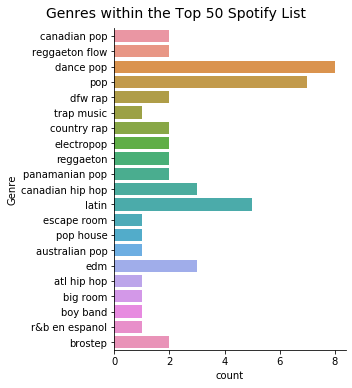

In [28]:
# Create a count plot

g=sns.catplot(y='Genre', data=df, kind='count')
g.fig.suptitle('Genres within the Top 50 Spotify List', fontsize = 14, y=1.03)

From this chart, we can see that the Dance Pop and Pop genres show up on the Spotify list the most often.

However, I'm unfamiliar with the genres 'big room' and 'escape room', so I want to pull those individual rows out of curiousity.

In [12]:
df[df['Genre'].isin(['big room','escape room'])]

,Track_Name,Artist_Name,Genre,BPM,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
19,Truth Hurts,Lizzo,escape room,158,62,72,-3,12,41,173,11,11,91
35,Summer Days (feat. Macklemore & Patrick Stump ...,Martin Garrix,big room,114,72,66,-7,14,32,164,18,6,89


Now let's see if any artists show up multiple times on the list.

In [13]:
df['Artist_Name'].value_counts()

Ed Sheeran          4
Post Malone         2
Lil Nas X           2
The Chainsmokers    2
Marshmello          2
Billie Eilish       2
Shawn Mendes        2
J Balvin            2
Ariana Grande       2
Sech                2
Khalid              1
Sam Smith           1
ROSALÍA             1
Katy Perry          1
MEDUZA              1
Martin Garrix       1
Anuel AA            1
Lil Tecca           1
Jonas Brothers      1
Lunay               1
Kygo                1
Tones and I         1
Maluma              1
Chris Brown         1
Taylor Swift        1
Jhay Cortez         1
Y2K                 1
Drake               1
Young Thug          1
Ali Gatie           1
Daddy Yankee        1
Lewis Capaldi       1
Bad Bunny           1
Lizzo               1
DJ Snake            1
Lauv                1
Nicky Jam           1
Lady Gaga           1
Name: Artist_Name, dtype: int64

We can see that Ed Sheeran shows up on the Top 50 list four times. Let's see what those four songs are.

In [14]:
df[df['Artist_Name'] == 'Ed Sheeran']

,Track_Name,Artist_Name,Genre,BPM,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
5,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
37,Antisocial (with Travis Scott),Ed Sheeran,pop,152,82,72,-5,36,91,162,13,5,87
49,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,95,79,75,-6,7,61,206,21,12,82


## Correlation

To see if there's any correlation between variables, let's create a heatmap. 

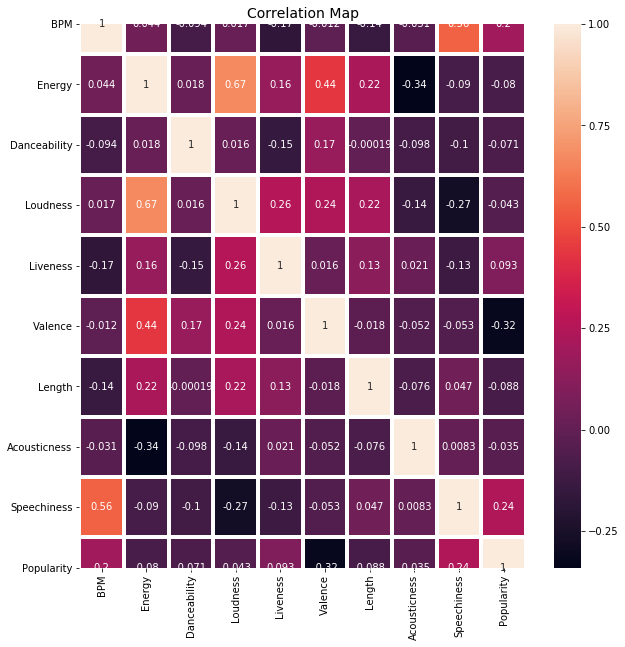

In [15]:
#Create a heatmap

plt.figure(figsize=(10,10))
plt.title('Correlation Map', fontsize=14)
sns.heatmap(df.corr(), linewidth=3.1, annot=True)

The heatmap shows that the items below have moderate correlation:

- Energy and Loudness
- Energy and Valence
- BPM and Speechiness

Using a scatterplot, let's see how Energy and Loudness relate to each other.

Text(0.5, 1.03, 'Energy vs. Loudness')

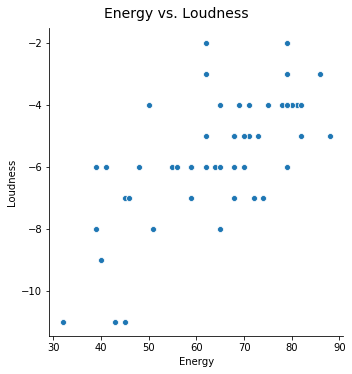

In [27]:
#Create a scatterplot

g=sns.relplot(x='Energy', y='Loudness', data=df, kind='scatter')
g.fig.suptitle('Energy vs. Loudness', fontsize=14, y=1.03)

We can see that higher energy songs are generally louder. What if we break this down by genre?

Text(0.5, 1.03, 'Energy vs. Loudness by Genre')

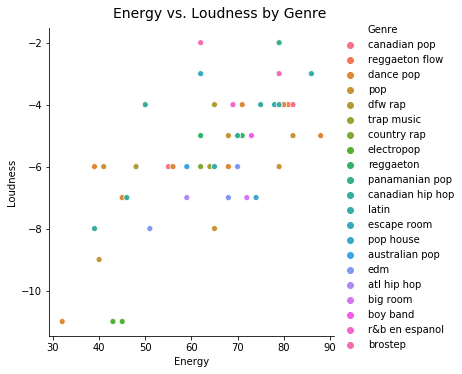

In [29]:
#Create a scatterplot with a subgroup

g=sns.relplot(x='Energy',y='Loudness',data=df,kind='scatter', hue='Genre')
g.fig.suptitle('Energy vs. Loudness by Genre', fontsize=14, y=1.03)

Now let's look at the five most popular genres and create a box plot to show the distribution of the Energy variable.

Text(0.5, 1.03, 'Energy by Genre')

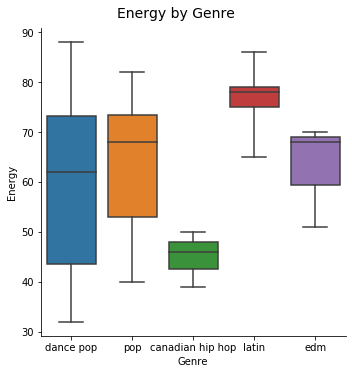

In [30]:
#Create new dataframe with only five genres

df_popular_genres = df[df['Genre'].isin(['dance pop', 'pop', 'latin', 'canadian hip hop', 'edm'])]

#Create box plot

g=sns.catplot(x='Genre', y='Energy', data=df_popular_genres, kind='box', whis=[0,100])
g.fig.suptitle('Energy by Genre', fontsize=14, y=1.03)

We can see that the Latin genre has the highest median Energy of these five genres, but the song with the max energy level is actually a Dance Pop song: Never Really Over by Katy Perry.

In [19]:
print(df['Energy'].max())
df[df['Energy'] == 88]

88


,Track_Name,Artist_Name,Genre,BPM,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
34,Never Really Over,Katy Perry,dance pop,100,88,77,-5,32,39,224,19,6,89


Now let's see how Energy and Valence compare.

Text(0.5, 1.03, 'Energy vs. Valence')

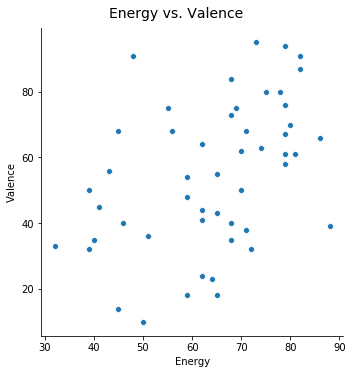

In [31]:
#Create a scatterplot

g=sns.relplot(x='Energy', y='Valence', data=df, kind='scatter')
g.fig.suptitle('Energy vs. Valence', fontsize=14, y=1.03)

We can see some correlation between energy and valence: higher energy songs generally have higher valence. Interestingly, the highest Energy song (Never Really Over by Katy Perry) has a lower than average Valence.

Never Really Over - 39
\
Average - 54.60

Lastly, let's look at Speechiness and BPM.

Text(0.5, 1.03, 'Speechiness vs. BPM')

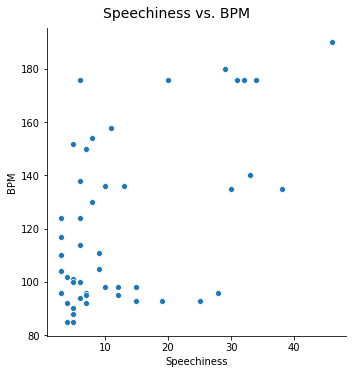

In [32]:
#Create scatter plot

g=sns.relplot(x='Speechiness',y='BPM',data=df,kind='scatter')
g.fig.suptitle('Speechiness vs. BPM', fontsize=14, y=1.03)

Most songs have a low level of Speechiness, and while there's some correlation here, the BPM is all over the place. Let's look at the distribution of Speechiness more closely.

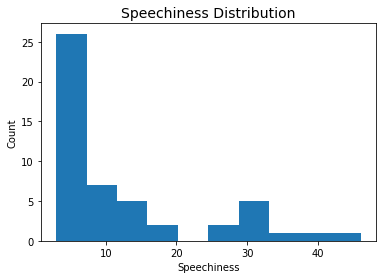

In [36]:
#Create a histogram

fig, ax = plt.subplots()
ax.hist(df['Speechiness'])
ax.set_xlabel('Speechiness')
ax.set_ylabel('Count')
ax.set_title('Speechiness Distribution', fontsize=14)
plt.show()

Again, we can see that most songs on the Top 50 list are not speechy. Now let's look at all of the songs with a Speechiness value over 30.

In [23]:
df[df['Speechiness'] > 30]

,Track_Name,Artist_Name,Genre,BPM,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
9,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95
10,Callaita,Bad Bunny,reggaeton,176,62,61,-5,24,24,251,60,31,93
16,LA CANCIÓN,J Balvin,latin,176,65,75,-6,11,43,243,15,32,90
31,7 rings,Ariana Grande,dance pop,140,32,78,-11,9,33,179,59,33,89
36,Otro Trago,Sech,panamanian pop,176,70,75,-5,11,62,226,14,34,91


Now that we've reviewed this data more closely, we have a better understanding of the Top 50 Spotify Songs of 2019.